# Flight Price Predicion✈️



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install flask flask_cors pandas seaborn sklearn openpyxl

Note: you may need to restart the kernel to use updated packages.


## Importing data

In [3]:
train_data=pd.read_excel('Data_Train.xlsx')
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Making a function for merging the values

In [6]:
def merge(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
    

In [7]:
train_data['Destination']=train_data['Destination'].apply(merge)

In [8]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

seprating data and month

In [9]:
train_data['Dep Month']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
train_data['Dep Day']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

train_data.drop('Date_of_Journey',axis=1,inplace=True)


In [10]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep Month,Dep Day
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4,27
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [11]:
train_data['Minutes']=pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data['Hours']=pd.to_datetime(train_data['Dep_Time']).dt.hour

train_data.drop('Dep_Time',axis=1,inplace=True)

In [12]:
train_data['Minutes']=pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data['Hours']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

train_data.drop('Arrival_Time',axis=1,inplace=True)

In [13]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep Month,Dep Day,Minutes,Hours
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,30,23
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,25,22
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,20,23
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,4,27,20,11
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,10,14


In [14]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

## Extracting data from Duration and droping the column

In [15]:
s=pd.to_timedelta(train_data['Duration'])
train_data['hours']=s.dt.components['hours']
train_data['minutes']=s.dt.components['minutes']

In [16]:
train_data.drop('Duration',axis=1,inplace=True)

In [17]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep Month,Dep Day,Minutes,Hours,hours,minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,3,24,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,30,23,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,25,22,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,27,20,23,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,27,20,11,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,12648,3,1,10,14,2,40


# Plotting Airline vs Price

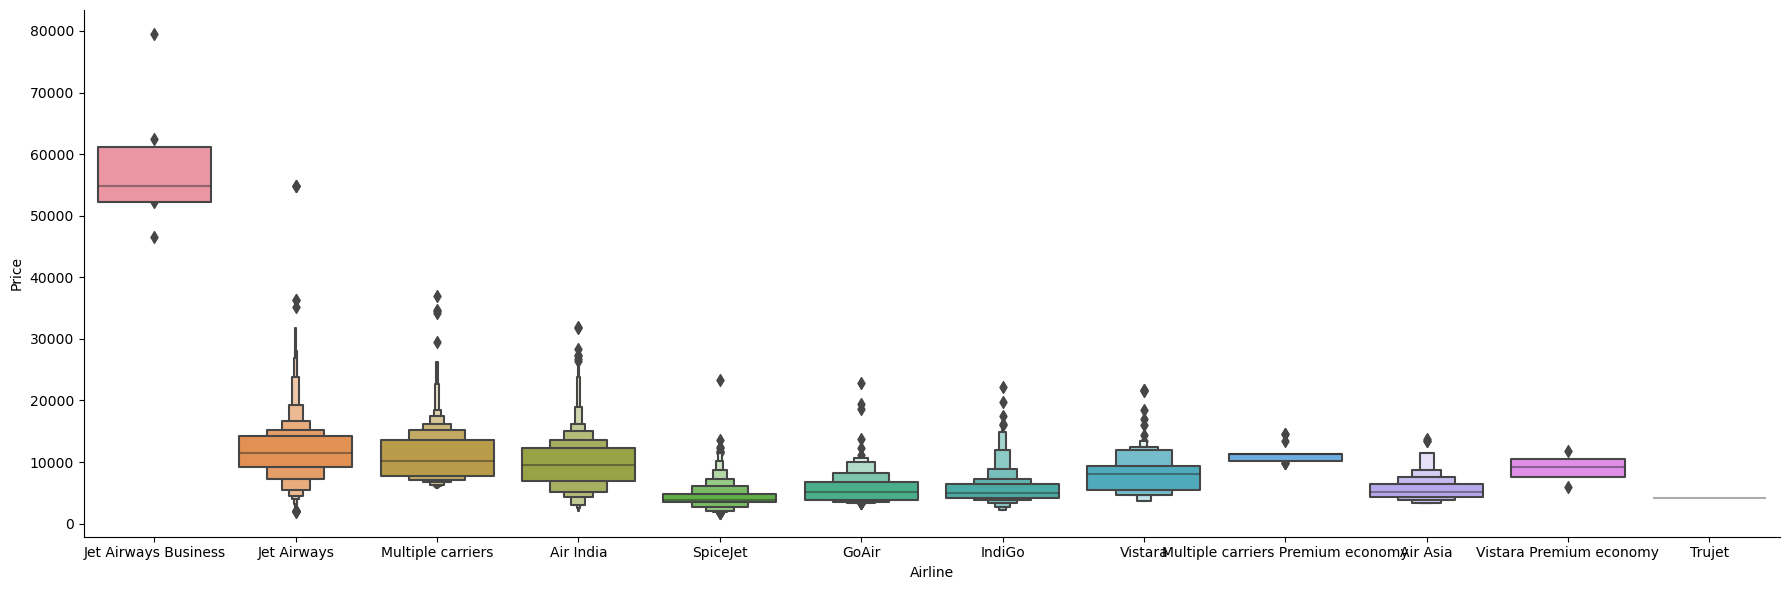

In [18]:
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6);

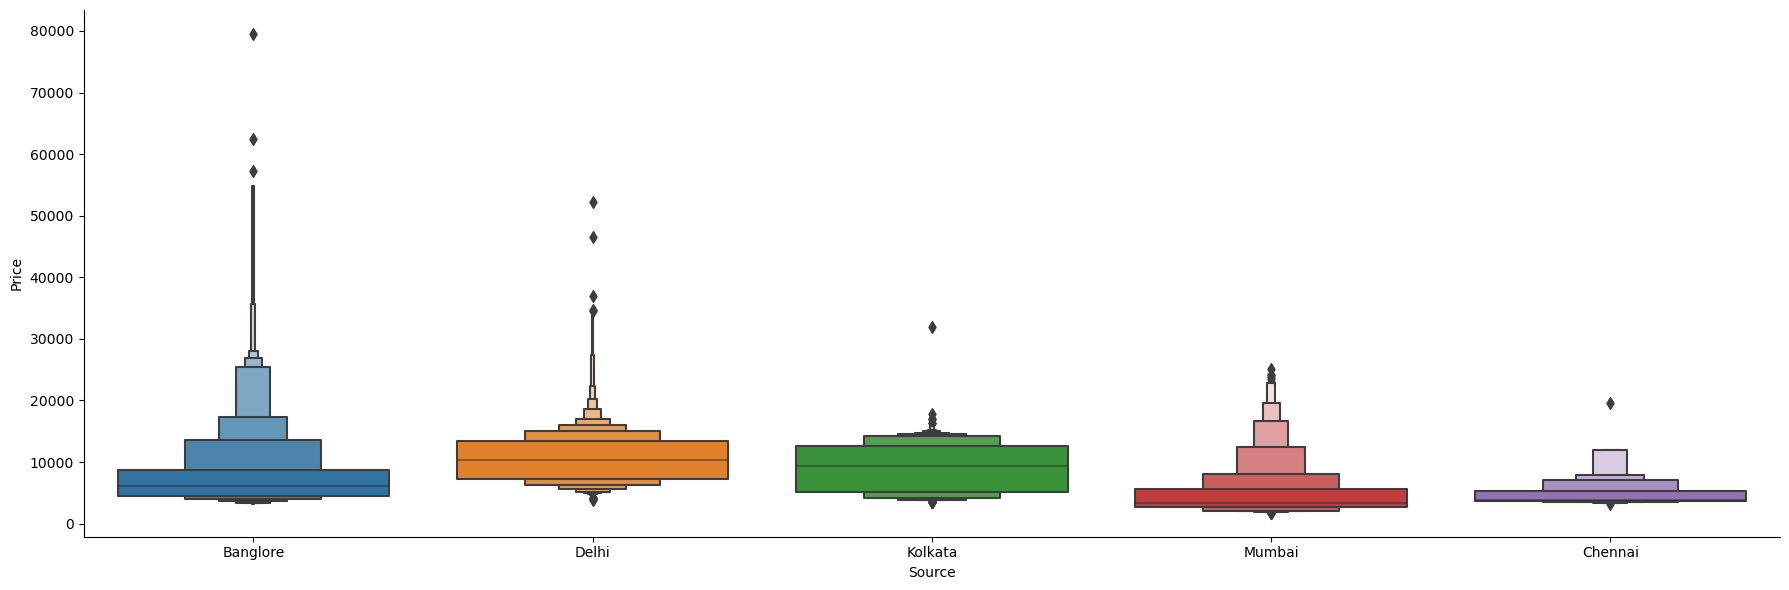

In [19]:
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6);

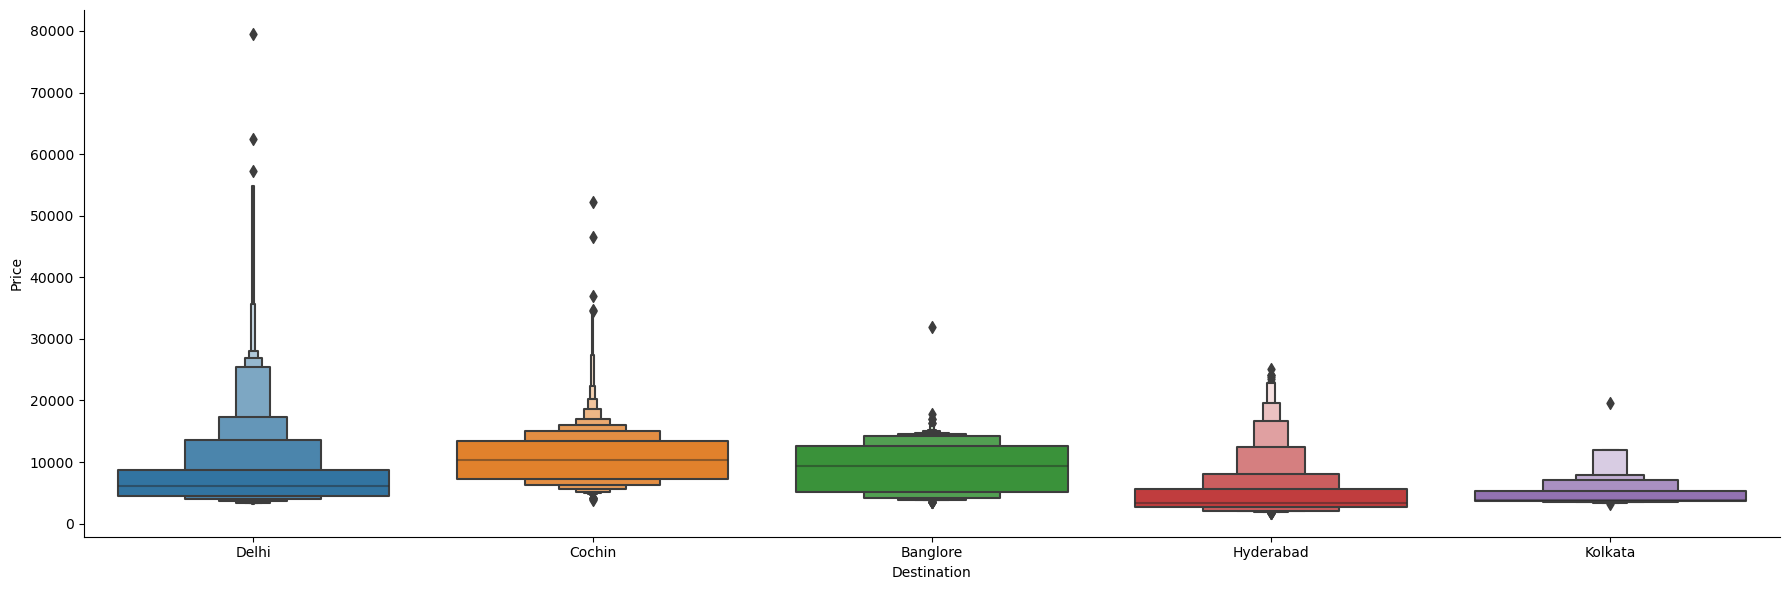

In [20]:
sns.catplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6);

# Observation from above Plots

What can we see in above three catplot that the most expensive airways is jet airways bussiness no matter from where you pick it. The most flights were picked from Banglore and their destination is mostly Delhi.

# Deleting the irrelevent columns

In [21]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
train_data

,Airline,Source,Destination,Total_Stops,Price,Dep Month,Dep Day,Minutes,Hours,hours,minutes
0,IndiGo,Banglore,Delhi,non-stop,3897,3,24,10,1,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,15,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,30,23,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,3,1,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,25,22,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27,20,23,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27,20,11,3,0
10681,Vistara,Banglore,Delhi,non-stop,12648,3,1,10,14,2,40


In [22]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# to change the total values from 1 stop to 1 number

In [23]:
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data

,Airline,Source,Destination,Total_Stops,Price,Dep Month,Dep Day,Minutes,Hours,hours,minutes
0,IndiGo,Banglore,Delhi,0.0,3897,3,24,10,1,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,15,13,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,30,23,5,25
4,IndiGo,Banglore,Delhi,1.0,13302,3,1,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,25,22,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,4,27,20,23,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,4,27,20,11,3,0
10681,Vistara,Banglore,Delhi,0.0,12648,3,1,10,14,2,40


# Creating dummies of the categorical data

In [24]:
airline=pd.get_dummies(train_data['Airline'])
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
source=pd.get_dummies(train_data['Source'])
source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [26]:
Destination=pd.get_dummies(train_data['Destination'])
Destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
10678,1,0,0,0,0
10679,1,0,0,0,0
10680,0,0,1,0,0
10681,0,0,1,0,0


In [27]:
train_data.drop(['Destination','Airline','Source'],axis=1,inplace=True)
train_data

,Total_Stops,Price,Dep Month,Dep Day,Minutes,Hours,hours,minutes
0,0.0,3897,3,24,10,1,2,50
1,2.0,7662,5,1,15,13,7,25
2,2.0,13882,6,9,25,4,19,0
3,1.0,6218,5,12,30,23,5,25
4,1.0,13302,3,1,35,21,4,45
...,...,...,...,...,...,...,...,...
10678,0.0,4107,4,9,25,22,2,30
10679,0.0,4145,4,27,20,23,2,35
10680,0.0,7229,4,27,20,11,3,0
10681,0.0,12648,3,1,10,14,2,40


In [28]:
train_data=pd.concat([train_data,airline,source,Destination],axis=1)
train_data

,Total_Stops,Price,Dep Month,Dep Day,Minutes,Hours,hours,minutes,Air Asia,Air India,...,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0.0,3897,3,24,10,1,2,50,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2.0,7662,5,1,15,13,7,25,0,1,...,0,0,0,1,0,1,0,0,0,0
2,2.0,13882,6,9,25,4,19,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.0,6218,5,12,30,23,5,25,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1.0,13302,3,1,35,21,4,45,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,4,9,25,22,2,30,1,0,...,0,0,0,1,0,1,0,0,0,0
10679,0.0,4145,4,27,20,23,2,35,0,1,...,0,0,0,1,0,1,0,0,0,0
10680,0.0,7229,4,27,20,11,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10681,0.0,12648,3,1,10,14,2,40,0,0,...,1,0,0,0,0,0,0,1,0,0


In [29]:
airline.shape,source.shape,Destination.shape

((10683, 12), (10683, 5), (10683, 5))

# Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Spliting the data in features and Target values

In [32]:
X=train_data.drop('Price',axis=1)

In [33]:
Y=train_data['Price']

In [34]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2)

In [35]:
X_train.head()

,Total_Stops,Dep Month,Dep Day,Minutes,Hours,hours,minutes,Air Asia,Air India,GoAir,...,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata
7546,1.0,6,12,15,19,7,50,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1120,0.0,6,24,25,22,1,20,0,1,0,...,0,0,0,0,1,0,0,0,1,0
7020,0.0,6,6,10,12,2,35,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2381,2.0,6,24,40,7,19,40,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7986,1.0,6,6,0,19,23,15,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [36]:
len(X_train)

8546

In [37]:
len(Y_train)

8546

In [38]:
np.random.state=42

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1)

# fitting the model
model.fit(X_train,Y_train)



RandomForestRegressor(n_jobs=-1)

In [39]:
train_data.isna().sum()

Total_Stops                          1
Price                                0
Dep Month                            0
Dep Day                              0
Minutes                              0
Hours                                0
hours                                0
minutes                              0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Banglore                 

In [40]:
train_data.dropna(axis=0,inplace=True)

In [41]:
train_data

,Total_Stops,Price,Dep Month,Dep Day,Minutes,Hours,hours,minutes,Air Asia,Air India,...,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0.0,3897,3,24,10,1,2,50,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2.0,7662,5,1,15,13,7,25,0,1,...,0,0,0,1,0,1,0,0,0,0
2,2.0,13882,6,9,25,4,19,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.0,6218,5,12,30,23,5,25,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1.0,13302,3,1,35,21,4,45,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,4,9,25,22,2,30,1,0,...,0,0,0,1,0,1,0,0,0,0
10679,0.0,4145,4,27,20,23,2,35,0,1,...,0,0,0,1,0,1,0,0,0,0
10680,0.0,7229,4,27,20,11,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10681,0.0,12648,3,1,10,14,2,40,0,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
train_data.isna().sum()

Total_Stops                          0
Price                                0
Dep Month                            0
Dep Day                              0
Minutes                              0
Hours                                0
hours                                0
minutes                              0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Banglore                 

# Checking Correlation between the features

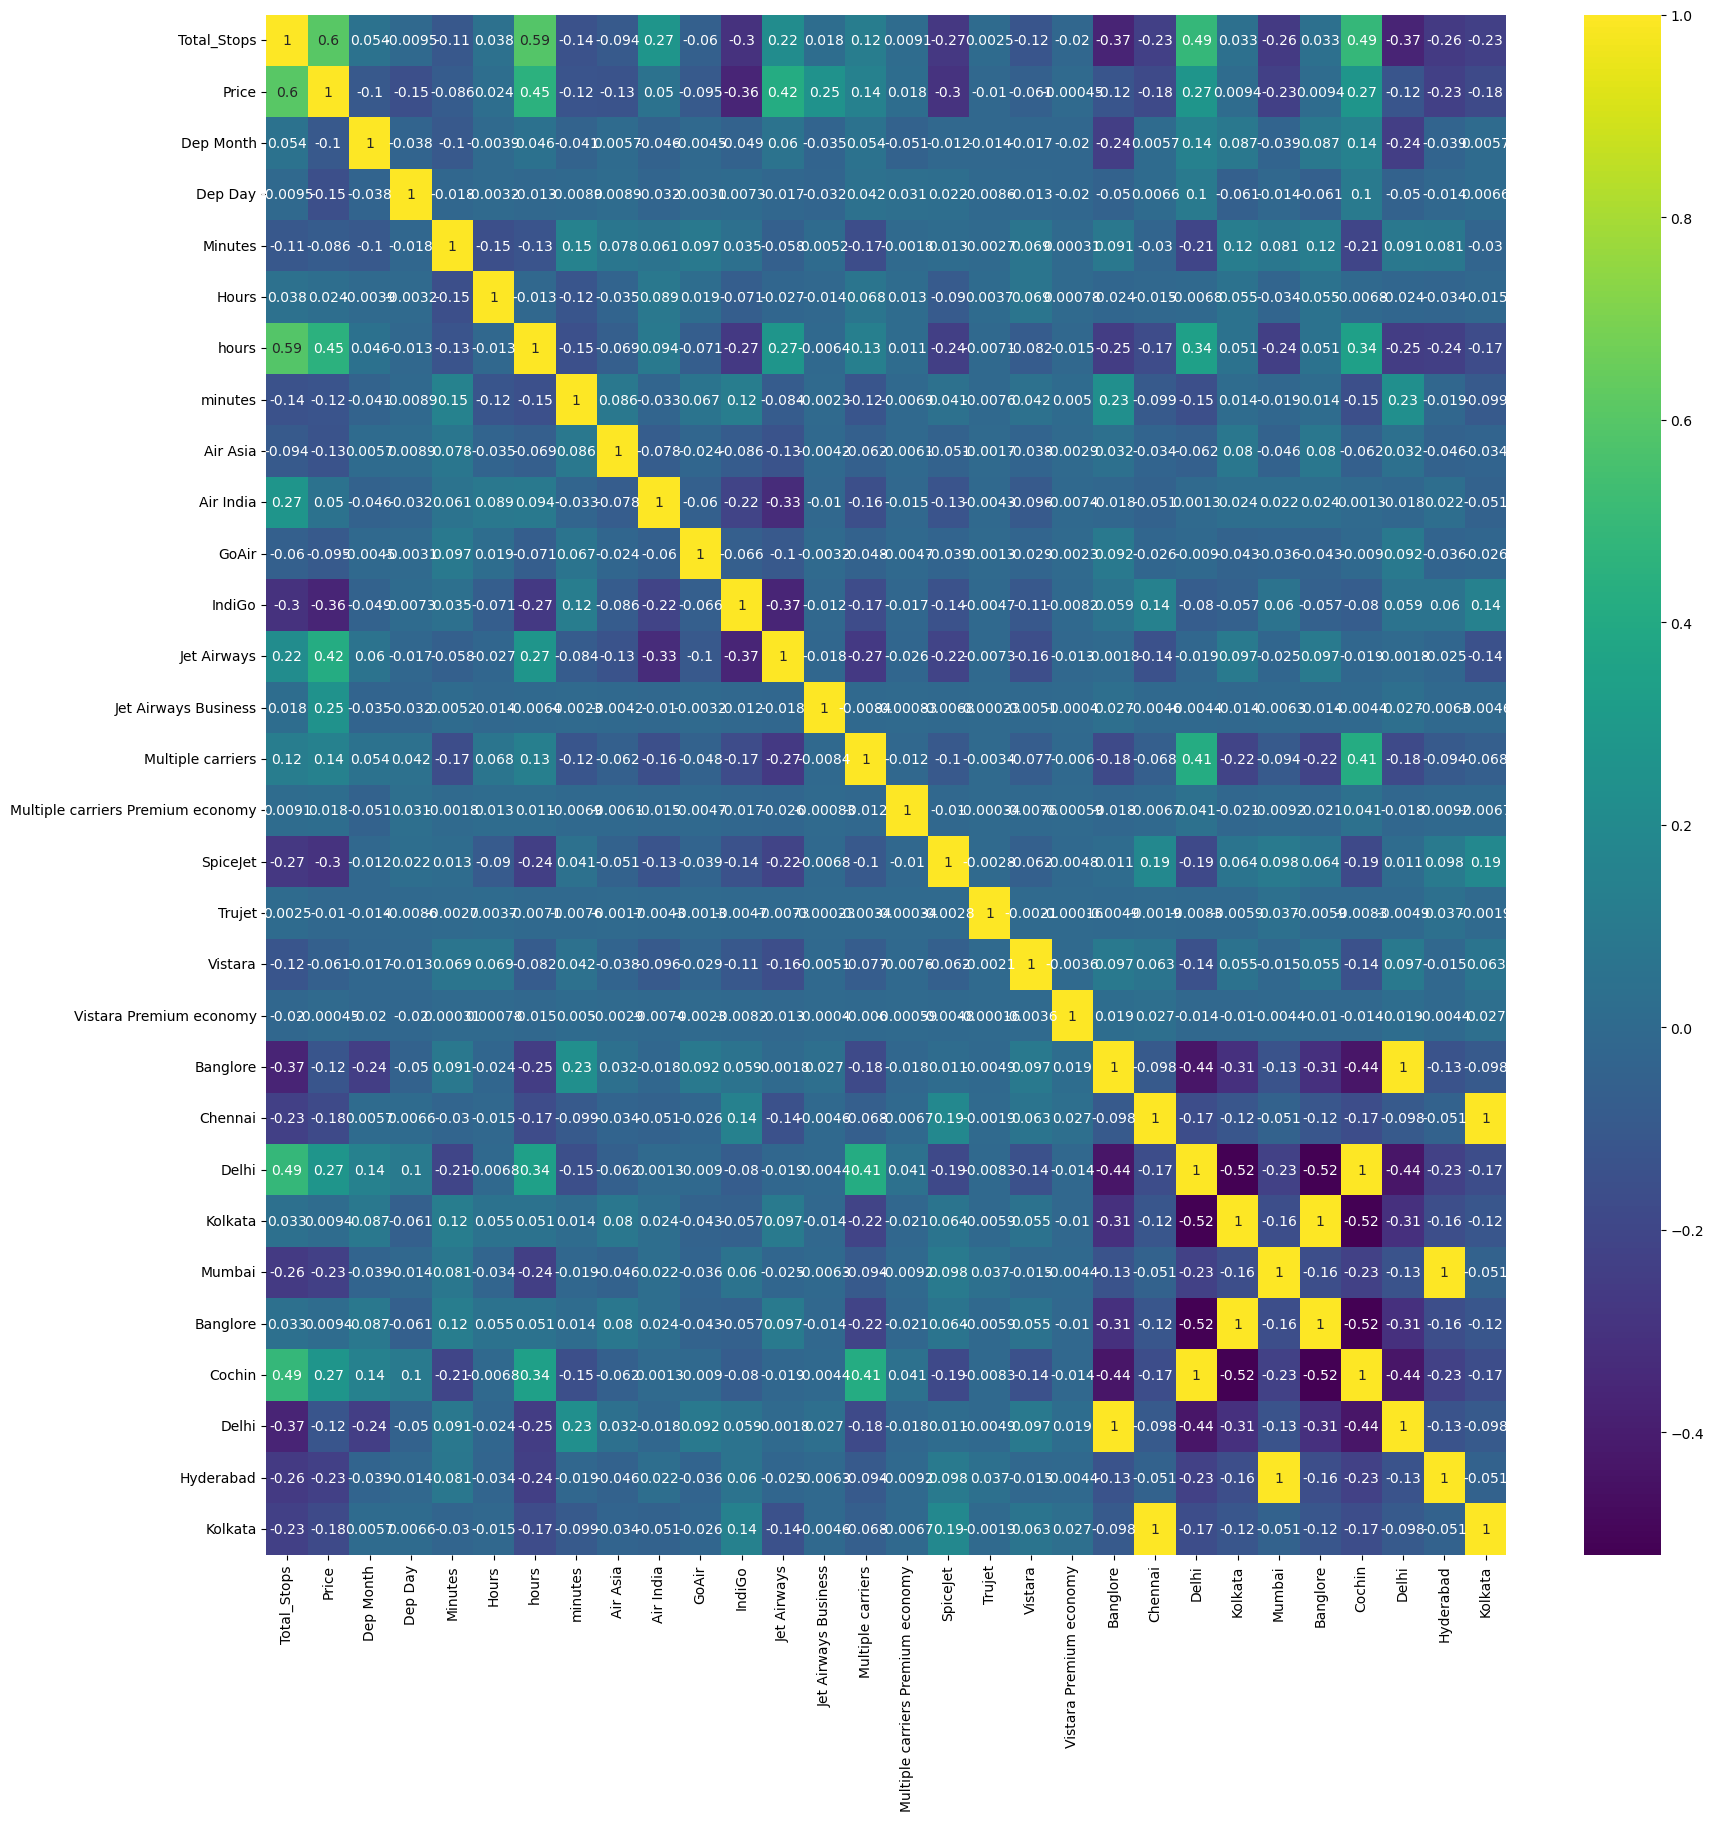

In [43]:
plt.subplots(figsize=(20,20))
sns.heatmap(train_data.corr(),cmap='viridis',annot=True);

# Lets continue our modelling

In [44]:
np.random.state=42

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
reg=RandomForestRegressor(n_jobs=-1)
# Splititng the data
X=train_data.drop('Price',axis=1)
Y=train_data['Price']
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2)
# fitting the model
reg.fit(X_train,Y_train)



RandomForestRegressor(n_jobs=-1)

In [45]:
reg.score(X_valid,Y_valid)

0.8064258491426546

In [80]:
reg_predict=reg.predict(X_valid)
reg_predict

array([10737.09      ,  3596.43      ,  8150.86797619, ...,
        4586.02      , 11077.05      , 10662.888     ])

# Trying different model to check which one is the better one

In [47]:
np.random.state=42
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
model=ExtraTreesRegressor(n_jobs=-1)
# Splititng the data
X=train_data.drop('Price',axis=1)
Y=train_data['Price']
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2)
# fitting the model
model.fit(X_train,Y_train)

ExtraTreesRegressor(n_jobs=-1)

In [48]:
model.score(X_train,Y_train)

0.9709142304168825

In [81]:
model_predict=model.predict(X_valid)
model_predict

array([10441.4  ,  3597.   ,  9014.52 , ...,  5363.14 , 11664.   ,
       11403.865])

In [50]:
model.score(X_valid,Y_valid)

0.7706314624091966

# Checking the importance of features 

As the Random forest regressor has a better score than the ExtraTreesRegressor so we will just check the features importance of rfr only.

In [51]:
reg.feature_importances_

array([4.14742223e-01, 5.72458176e-02, 1.43200985e-01, 2.71985678e-02,
       4.88334996e-02, 4.65546392e-02, 3.03511499e-02, 1.62935042e-03,
       5.88595961e-03, 1.42847763e-03, 1.18322113e-02, 8.07359660e-02,
       5.81527256e-02, 2.19333169e-02, 8.15143990e-04, 4.98423001e-03,
       2.78948426e-04, 4.75047270e-03, 3.89590911e-05, 8.36012316e-03,
       5.06068268e-04, 2.28978678e-03, 3.46539908e-03, 4.26944732e-03,
       3.33109163e-03, 2.53006882e-03, 1.02973145e-02, 3.95306319e-03,
       4.04993490e-04])

In [52]:
def plot(columns,importance,n=20):
    data=(pd.DataFrame({'features':columns,
                       'features_importance':importance})
                       .sort_values('features_importance',ascending=False)
                       .reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(data['features'][:n],data['features_importance'][:20])
    ax.invert_yaxis()

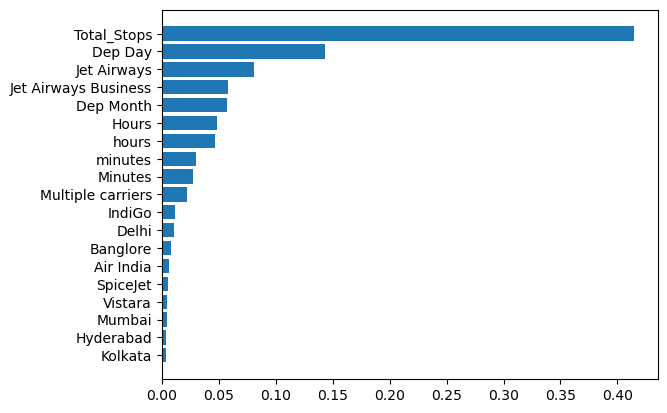

In [53]:
plot(X_train.columns,reg.feature_importances_)

So from here we observe that the price is more correlated to total_stops. Well its true as the number of stops increase the fare will also increase

# Hypertuning the reg model

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':n_estimators,
      'max_features':max_features,
     'max_depth':max_depth,
     'min_samples_split':min_samples_split,
     'min_samples_leaf':min_samples_leaf}

rs_reg=RandomizedSearchCV(estimator=RandomForestRegressor(),
                          param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2,
                         random_state=42)
rs_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.6s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.2s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.0s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.1s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.7s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.8s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.7s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.0s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.6s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.3s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.3s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.6s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.6s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  12.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  12.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_feat

C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.3s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.5s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.6s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.6s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.9s


C:\Users\acer\pandas\sample_project_2\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [106]:
rs_reg.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [107]:
y_predict=rs_reg.predict(X_valid)
y_predict

array([10669.42858227,  3636.01578879,  9540.88932429, ...,
        4482.83555988, 11425.20503653, 12047.78990697])

In [108]:
rs_reg.score(X_valid,Y_valid)

0.8416463397385372

# Plotting the residual

C:\Users\acer\AppData\Local\Temp\ipykernel_15948\2314662917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_preds)


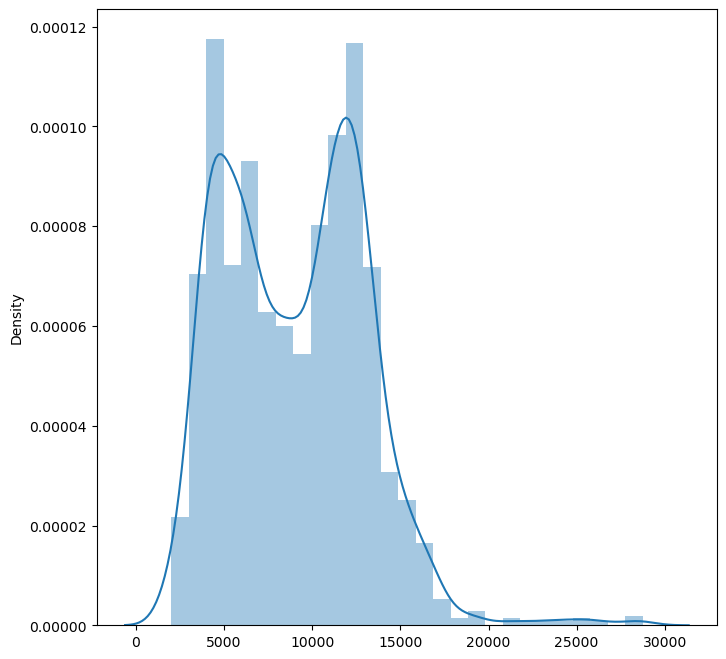

In [92]:
plt.subplots(figsize=(8,8))
sns.distplot(y_preds)
plt.show()

## Scatter plot

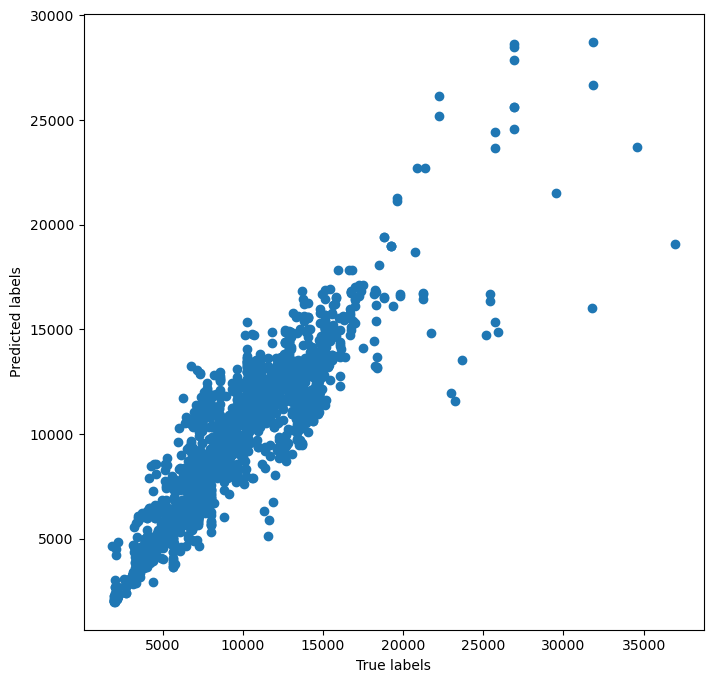

In [61]:
plt.subplots(figsize=(8,8))
plt.scatter(Y_valid,y_preds)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

### As its observable through the scatter plot that the points coincide or are very near to each other which shows are more is predicting it right or is nearlly correct. So we dont need to tune it more.

# R2 score

In [62]:
from sklearn.metrics import r2_score

## RandomizedSearchCV

In [93]:
print(f'R_2 Score value for the Regression model is : {r2_score(Y_valid,y_preds):.2f}')

R_2 Score value for the Regression model is : 0.84


## RandomForestRegressor

In [84]:
print(f'R_2 Score value for the Regression model is : {r2_score(Y_valid,reg_predict):.2f}')

R_2 Score value for the Regression model is : 0.92


## ExtraTreesRegressor

In [85]:
print(f'R_2 Score value for the Regression model is : {r2_score(Y_valid,model_predict):.2f}')

R_2 Score value for the Regression model is : 0.77


# Compare all the model we tried with their R_score

In [94]:
com_models={'RandomizedSearchCV(RFR)':r2_score(Y_valid,y_preds),
            'ExtraTreesRegressor':r2_score(Y_valid,model_predict),
           ' RandomForestRegressor': r2_score(Y_valid,reg_predict)}
df=pd.DataFrame(com_models,index=[0])
df

,RandomizedSearchCV(RFR),ExtraTreesRegressor,RandomForestRegressor
0,0.842039,0.770631,0.923404


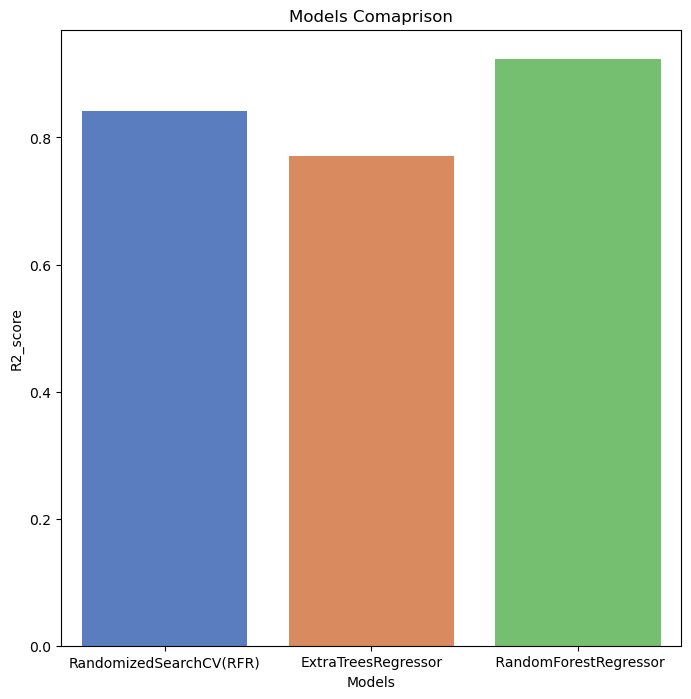

In [97]:
ax,fig=plt.subplots(figsize=(8,8))
ax=sns.barplot(df,palette='muted')
plt.xlabel('Models')
plt.ylabel('R2_score')
plt.title('Models Comaprison')
plt.show()

* Maybe the R_2 SCORE Of RandomForestRegressor is more than other two model.But its shows that there are some few features in RandomForestRegressor because of which the R_2 Score is high.

# Loading the model

In [102]:
import pickle

In [111]:
file = open('Flight_rs.pkl', 'wb')
pickle.dump(rs_reg, file)